In [11]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import time

In [19]:
img = cv2.imread("image/problem3.bmp",cv2.CV_LOAD_IMAGE_UNCHANGED)

height, width = img.shape[:2]

In [41]:
mask_size = int(input('Input mask size:'))
mask = np.zeros((mask_size,mask_size))

Input mask size:91


In [42]:
out = np.zeros((height,width))
print 'running...'
_min = 0
_max = 255
ticks = time.time()
for i in range(mask_size/2,height-mask_size/2):
    for j in range(mask_size/2,width-mask_size/2):
        hist = np.zeros((256))
        for u in range(np.size(mask,0)):
            for v in range(np.size(mask,1)):
                hist[img[i+u-mask_size/2][j+v-mask_size/2]] += 1
        for k in range(1,hist.size):
            hist[k] += hist[k-1]
        h = hist[img[i][j]] * (hist.size - 1) /np.size(mask,0) / np.size(mask,1)#/ img.getHeigh() / img.getWidth()
        out[i][j] = h
        if (out[i][j] > _max):
            _max = out[i][j]
        if (out[i][j] < _min):
            _min = out[i][j]

for i in range(mask_size/2,height-mask_size/2):
    for j in range(mask_size/2,width-mask_size/2):
        out[i][j] = out[i][j]/(_max -_min)
t = time.time()-ticks
print 'time:',t,'\nDone!'

running...
time: 813.577257156 
Done!


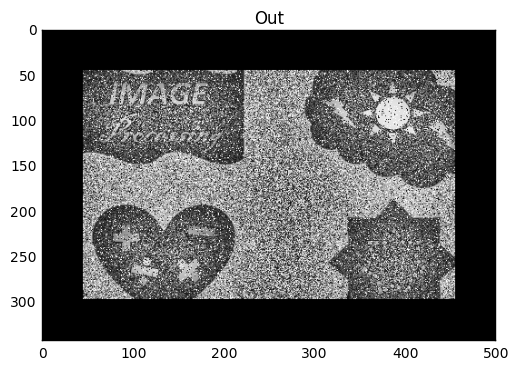

In [43]:
plt.subplot(111),plt.title("Out")
plt.imshow(out,cmap = 'gray')
plt.savefig('3_'+ str(mask_size)+ '.png')
plt.show()